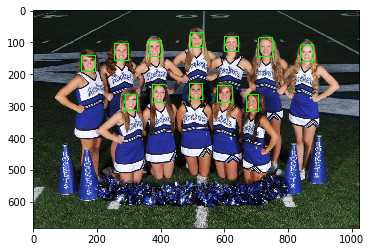

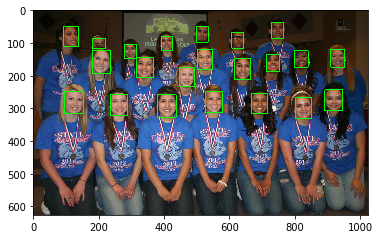

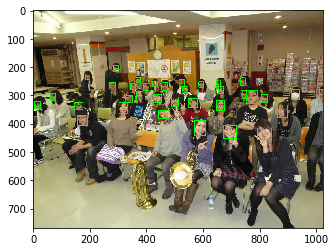

Checking cropped images...
7_Cheering_Cheering_7_74 12


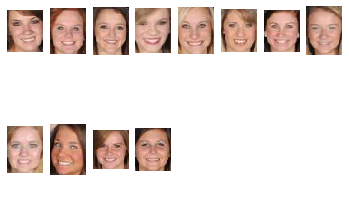

7_Cheering_Cheering_7_543 22


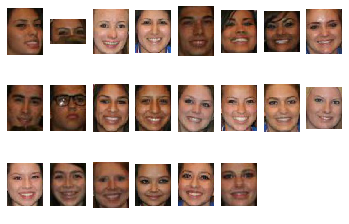

7_Cheering_Cheering_7_889 35


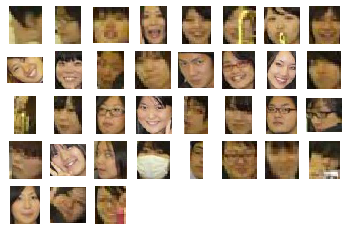

Face Detection using dlib:
7_Cheering_Cheering_7_74.jpg #det1:12 #gt1:12


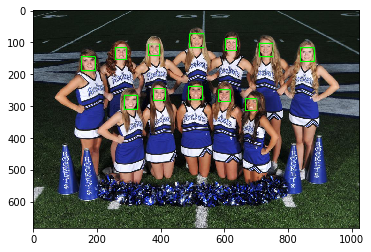

7_Cheering_Cheering_7_543.jpg #det2:21 #gt2:22


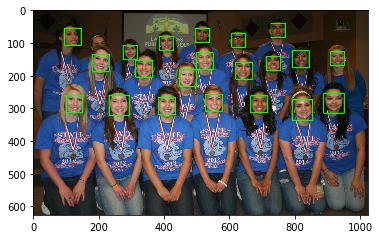

7_Cheering_Cheering_7_889.jpg #det3:7 #gt3:35


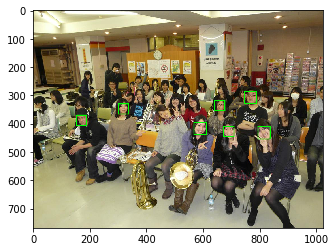

In [3]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
    for img_name in annotate_dict:
        img_path = os.path.join(data_dir, img_name)
        img      = cv2.imread(img_path)
        
        if img is None:
            print("路徑錯誤")
            
        for bbox in annotate_dict[img_name]:  
            img = cv2.rectangle(img, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,255,0), thickness=2) 
        
        img = img[:,:,::-1] # convert from BGR to RGB
        plt.imshow(img)
        plt.show()

def save_bbox():
  save_dir = 'save_dir' # Do not change this line
  if not os.path.exists(save_dir):
            os.mkdir(save_dir)
            
  for img_name in annotate_dict:
      img_path = os.path.join(data_dir, img_name)
      img      = cv2.imread(img_path)
      
      for j, bbox in enumerate(annotate_dict[img_name]):
          img_crop  = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
          save_name = img_name.replace('.jpg','_'+str(j)+'.jpg')
          save_path = os.path.join(save_dir, save_name)    
          cv2.imwrite(save_path,img_crop)    

# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
  detector = dlib.get_frontal_face_detector()
  for i,img_name in enumerate(annotate_dict):
      img_path = os.path.join(data_dir, img_name)
      img      = cv2.imread(img_path)
      img1 = img.copy()
      dets = detector(img, 1)
      for j,det in enumerate(dets):
          x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom() 
          img1 = cv2.rectangle(img1, (x1, y1), (x2, y2), (0, 255, 0), 2, cv2.LINE_AA)
      print(img_name,'#det'+str(i+1)+':'+str(j+1),'#gt'+str(i+1)+':'+str(len(annotate_dict[img_name])))
      img1 = img1[:,:,::-1] # convert from BGR to RGB
      plt.imshow(img1)
      plt.show()

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()

In [ ]:
# Explain the reason why dlib cannot detect all the faces in 7_Cheering_Cheering_7_889.jpg (5%)
# 臉部被擋住，臉部在畫面中的比例較小，頭部有大幅度的傾斜。